In [72]:
from sklearn.model_selection import train_test_split
import matplotlib as plt
from sklearn.datasets import make_regression
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

Se crea un dataframe donde se coloquen todos los datos, esto a partir de un diccionario donde se involucren todos los arreglos con los datos para luego crear un DataFrame con Numpy

In [73]:
Peso = [849, 850, 950, 1640, 150, 750, 600, 875, 975, 450, 1050, 335, 525, 850, 760, 1212]
Volumen = [890, 805, 1001, 1525, 39, 701, 641, 1028, 1492, 519, 1110, 505, 834, 944, 920, 1350]
Tapas = ["D", "D", "D", "D", "D", "D", "D", "D", "B", "B", "B", "B", "B", "B", "B", "B"]
Tapas_B = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

d = {"Peso":Peso, "Volumen":Volumen, "Tapas":Tapas}
housing = pd.DataFrame(d)
housing

,Peso,Volumen,Tapas
0,849,890,D
1,850,805,D
2,950,1001,D
3,1640,1525,D
4,150,39,D
5,750,701,D
6,600,641,D
7,875,1028,D
8,975,1492,B
9,450,519,B


In [74]:
respuesta = housing["Peso"].copy()
housing = housing.drop("Peso", axis=1)

# Comprobar mediante analisis grafico y correlacion si existe una relacion lineal significativa entre la variable peso y la variable volumen

In [76]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Volumen  16 non-null     int64 
 1   Tapas    16 non-null     object
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [77]:
housing.describe()

,Volumen
count,16.000000
mean,894.000000
std,381.112757
min,39.000000
25%,686.000000
50%,905.000000
75%,1048.500000
max,1525.000000


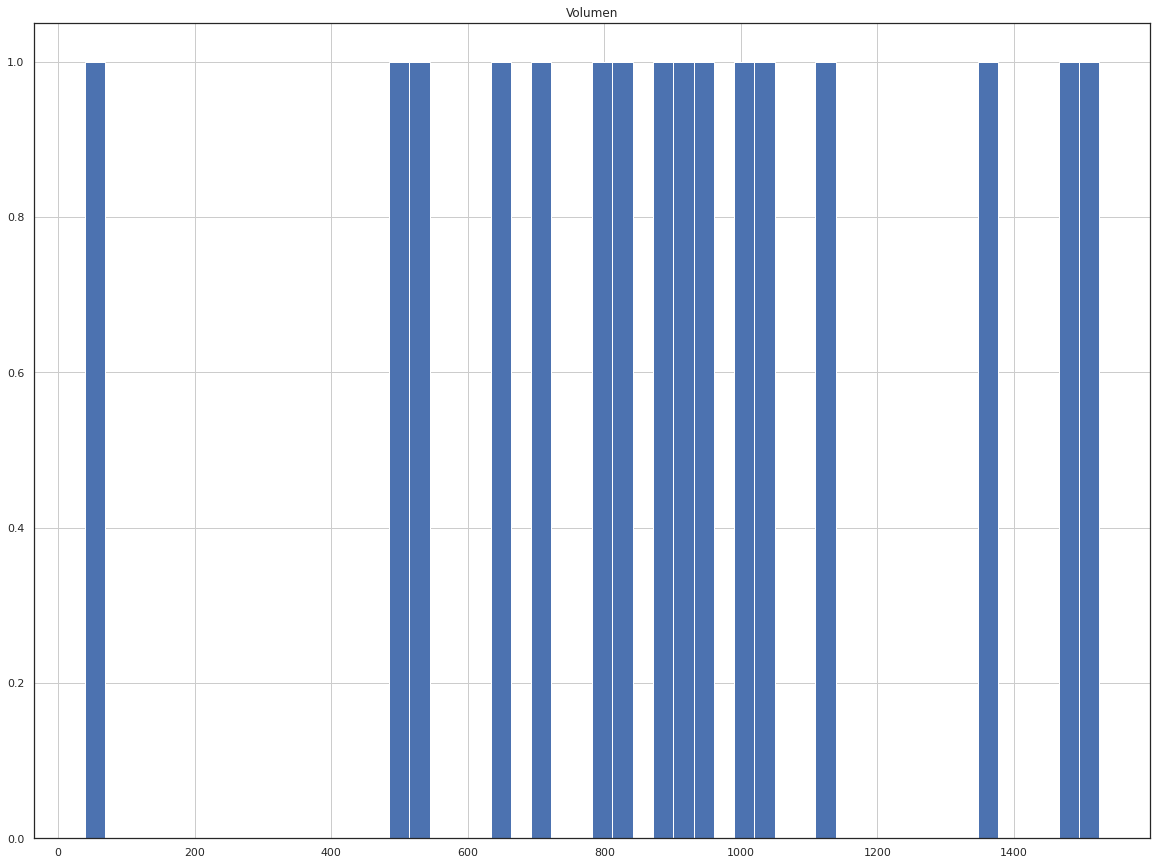

In [78]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [80]:
# imputar NAs----------------------------------------------------
from sklearn.impute import SimpleImputer
imputador = SimpleImputer(strategy="median")
# imputador.fit(housing) # da error
# se quita la variable categorica--------------------------------
housing_num = housing.drop("Tapas", axis=1)
# se calcula la imputacion---------------------------------------
imputador.fit(housing_num)
# los valores de las mediana
## SimpleImputer(strategy='median')
print(imputador.statistics_)
# se aplica la imputacion----------------------------------------
housing_num_i = imputador.transform(housing_num)
# volver a data frame--------------------------------------------
housing_i = pd.DataFrame(housing_num_i,
columns=housing_num.columns, index=housing.index)
# Comprobar df imputado------------------------------------------
print(housing_i.info())

[905.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volumen  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes
None


In [81]:
# importar el "estandarizador"-----------------------------------
from sklearn.preprocessing import StandardScaler
# importar la clase pipeline"------------------------------------
from sklearn.pipeline import Pipeline
# definir el pipeline--------------------------------------------
num_pipeline = Pipeline([
("imputador", SimpleImputer(strategy="median")),
("std_scaler", StandardScaler()),
])
# aplicar el pipeline--------------------------------------------
housing_num_tr = num_pipeline.fit_transform(housing_num)
# importar clase-------------------------------------------------
from sklearn.linear_model import LinearRegression
# ajustar el modelo----------------------------------------------
lm1 = LinearRegression()
lm1.fit(housing_num_tr, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto
print(lm1.intercept_)
# coeficientes de regresion
print(lm1.coef_)

801.3125
[312.34024864]


In [82]:
# cargar funciones-----------------------------------------------
import statsmodels.api as sm
from scipy import stats
# definir matriz de disenyo y variable respuesta-----------------
X = housing_num_tr
y = respuesta
# anyadir intercepto---------------------------------------------
X2 = sm.add_constant(X)
# ajustar el modelo----------------------------------------------
est = sm.OLS(y, X2)
# ver ajuste-----------------------------------------------------
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     67.44
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           1.01e-06
Time:                        00:36:34   Log-Likelihood:                -102.03
No. Observations:                  16   AIC:                             208.1
Df Residuals:                      14   BIC:                             209.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        801.3125     38.033     21.069      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


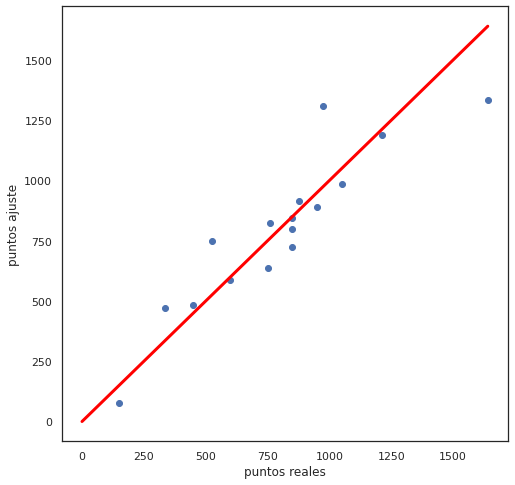

In [83]:
# pintar reales vs predichos
fig = plt.figure(figsize=(8, 8))
y_pred = lm1.predict(housing_num_tr)
plt.scatter(y, y_pred)
plt.xlabel("puntos reales")
plt.ylabel("puntos ajuste")
plt.plot([0, max(y)], [0, max(y)], color = 'red', linewidth = 3)
plt.show()

In [62]:
train_data = housing.copy()
train_data
mat_corr = train_data.corr()
mat_corr

,Peso,Volumen
Peso,1.000000,0.910001
Volumen,0.910001,1.000000


La correlacion entre peso y volumen es de 0.910001, lo cual indica que la correlacion es alta, ya que maximo puede ser 1


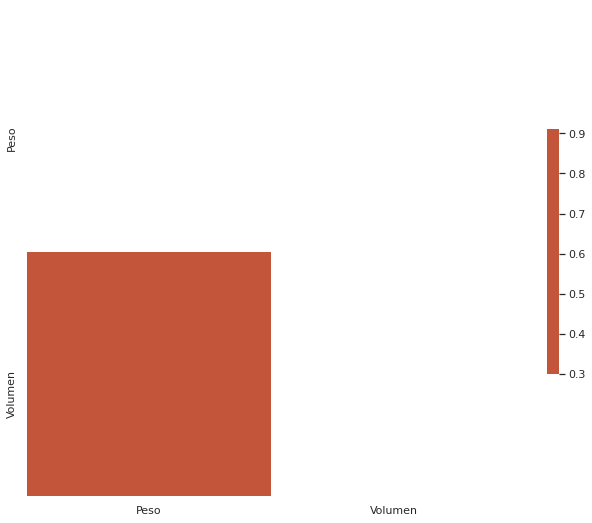

In [63]:
import seaborn as sns
sns.set_theme(style="white")
mask = np.triu(np.ones_like(mat_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se puede comprobar graficamente en un diagrama de calor que la correlacion es alta. Si existieran mas valores, se podria observar tendencia de algunos valores a colores cercanos al azul, indicando valores de correlacion bajos.

# Comprobar mediante un boxplot, si la variable tapas puede influir de forma significativa en el peso


Accuracy:  0.0


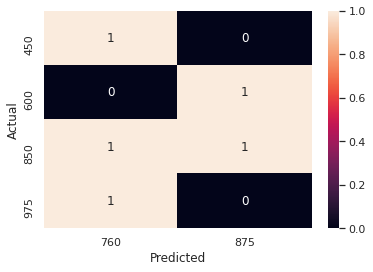

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


candidates = {'Peso': Peso,
              'Tapas': Tapas_B,
              }
df = pd.DataFrame(candidates,columns= ['Peso', 'Tapas'])

#print (df)
X = df[['Tapas']]
y = df['Peso']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [39]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Peso     16 non-null     int64 
 1   Volumen  16 non-null     int64 
 2   Tapas    16 non-null     object
dtypes: int64(2), object(1)
memory usage: 512.0+ bytes


In [85]:
# Transformar variable categorica en variables indicadoras-------
# guardar variable-----------------------------------------------
ocean_cat = housing[["Tapas"]]
# crear categorias para los encabezados--------------------------
header_ocean_cat = housing["Tapas"].unique()
from sklearn.preprocessing import OneHotEncoder
indicar_var = OneHotEncoder(sparse=False)
ocean_indicadora = indicar_var.fit_transform(ocean_cat)
print(ocean_indicadora)
# volver a data frame--------------------------------------------

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [86]:
ocean_df = pd.DataFrame(ocean_indicadora,
columns = header_ocean_cat, index = housing.index)
# Comprobar ocean_df---------------------------------------------
print(ocean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D       16 non-null     float64
 1   B       16 non-null     float64
dtypes: float64(2)
memory usage: 384.0 bytes
None


In [87]:
print(ocean_df.head())

     D    B
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0


In [89]:
# importar clase-------------------------------------------------
from sklearn.compose import ColumnTransformer
# separar dataset en variables numericas y variable categorica---
num_attribs = list(housing_num)
cat_attribs = ["Tapas"]
# definir full pipeline------------------------------------------
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs), ######################################################################################################
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.01083979,  0.        ,  1.        ],
       [-0.24118533,  0.        ,  1.        ],
       [ 0.28996438,  0.        ,  1.        ],
       [ 1.70997687,  0.        ,  1.        ],
       [-2.31700511,  0.        ,  1.        ],
       [-0.52301987,  0.        ,  1.        ],
       [-0.68561672,  0.        ,  1.        ],
       [ 0.36313296,  0.        ,  1.        ],
       [ 1.6205486 ,  1.        ,  0.        ],
       [-1.01623031,  1.        ,  0.        ],
       [ 0.58534866,  1.        ,  0.        ],
       [-1.05416957,  1.        ,  0.        ],
       [-0.16259685,  1.        ,  0.        ],
       [ 0.13549737,  1.        ,  0.        ],
       [ 0.07045863,  1.        ,  0.        ],
       [ 1.23573606,  1.        ,  0.        ]])

In [90]:
# importar clase-------------------------------------------------
from sklearn.linear_model import LinearRegression
# ajustar el modelo----------------------------------------------
lm2 = LinearRegression()
lm2.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
print(lm2.intercept_)

801.3125


In [92]:
print(lm2.coef_)

[328.20527476 -89.72209373  89.72209373]


In [94]:
# importar clase-------------------------------------------------
from sklearn.compose import ColumnTransformer
# separar dataset en variables numericas y variable categorica---
num_attribs = list(housing_num)
cat_attribs = ["Tapas"]
# definir full pipeline------------------------------------------
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(drop = "first"), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)
# importar clase-------------------------------------------------
from sklearn.linear_model import LinearRegression
# ajustar el modelo----------------------------------------------
lm2 = LinearRegression()
lm2.fit(housing_prepared, respuesta)
# obtener coeficientes del modelo--------------------------------
# intercepto

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
print(lm2.intercept_)
# coeficientes de regresion

711.5904062704475


In [96]:
print(lm2.coef_)

[328.20527476 179.44418746]


In [97]:
# cargar funciones-----------------------------------------------
import statsmodels.api as sm
from scipy import stats
# definir matriz de disenyo y variable respuesta-----------------
X = housing_prepared
y = respuesta
# anyadir intercepto---------------------------------------------
X2 = sm.add_constant(X)
# ajustar el modelo----------------------------------------------
est = sm.OLS(y, X2)
# ver ajuste-----------------------------------------------------
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     54.99
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           4.53e-07
Time:                        00:38:54   Log-Likelihood:                -98.140
No. Observations:                  16   AIC:                             202.3
Df Residuals:                      13   BIC:                             204.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        711.5904     44.121     16.128      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


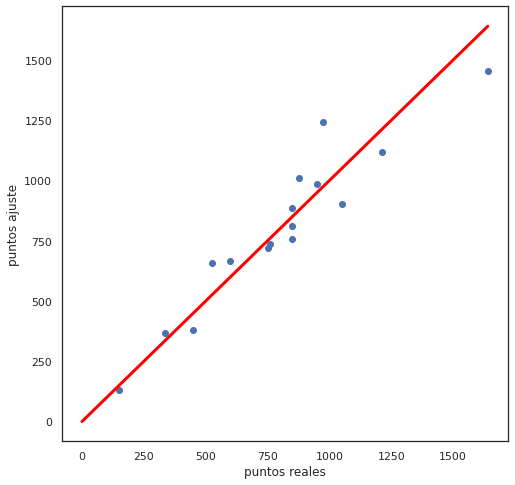

In [98]:
#pintar reales vs predichos
fig = plt.figure(figsize=(8, 8))
y_pred = lm2.predict(housing_prepared)
plt.scatter(y, y_pred)
plt.xlabel("puntos reales")
plt.ylabel("puntos ajuste")
plt.plot([0, max(y)], [0, max(y)], color = 'red', linewidth = 3)
plt.show()

In [ ]:
print(mean_squared_error(y_predict,y_test))